In [42]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [43]:
train_dataset = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [65]:
class Noisy(torch.utils.data.Dataset):
    
    def __init__(self, dataset, phase=None):

        if phase == 'train':
            start = 0
            end = int(len(dataset)*.75)
        elif phase == 'val':
            start = int(len(dataset)*.75)
            end = len(dataset)
        else:
            start = 0
            end = len(dataset)

        self.dataset = dataset.data[start:end] / 255

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        data = self.dataset[idx] + torch.rand(28, 28) / 2
        target = self.dataset[idx]
            
        return data, target

In [66]:
dataset = Noisy(train_dataset, 'train')

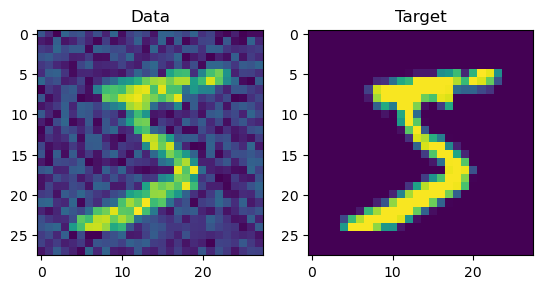

In [68]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(dataset[0][0].squeeze())
axs[1].imshow(dataset[0][1].squeeze())

axs[0].title.set_text('Data')
axs[1].title.set_text('Target')

plt.show()